**Background Information**

You work for Koppokoppo, a company that offers market-appropriate solutions to enable
and incentivize businesses to go digital. The company partners with financial institutions,
mobile operators and major retailers who are interested in marketing new payment
services to small and medium enterprises. In turn, the company offers small and medium
enterprises loans.

**Problem Statement**

As a Data Scientist, you are required to create a model that will allow Koppokoppo to
provide a solution is able to predict whether a loan offered to the certain small and
medium enterprise will be paid off.


  **Define the Research Question**
- Will a business default the specified loan amount?

Metric of Successs
-Develop a prediction model with higher than 90% accuracy


2. Data Importation

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/KoppoKoppoDS')
df.head(5)

,Selected,LoanNr_ChkDgt,Name,Zip,ICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,...,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,92801,532420,15074,2001,36,1,1.0,...,P I F,0,30000,15000,0,0,0.5,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,90505,531210,15130,2001,56,1,1.0,...,P I F,0,30000,15000,0,0,0.5,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",92103,531210,15188,2001,36,10,1.0,...,P I F,0,30000,15000,0,0,0.5,1080,16298.0,0
3,1,1005535001,Shiva Management,92108,531312,15719,2003,36,6,1.0,...,P I F,0,50000,25000,0,0,0.5,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",91345,531390,16840,2006,240,65,1.0,...,P I F,0,343000,343000,0,1,1.0,7200,24103.0,0


**Glossary**

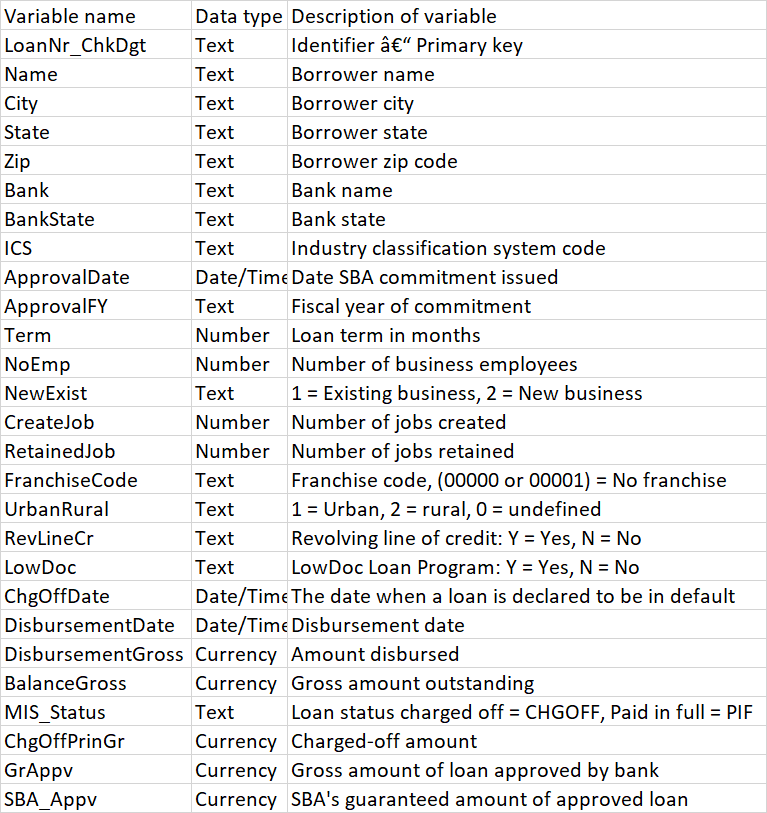

In [2]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max.columns", None)
pd.set_option("display.max_colwidth", None)

**2. Data Analysis**

In [3]:
df.shape

(2102, 30)

In [4]:
df.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'Zip', 'ICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion',
       'daysterm', 'xx', 'Default'],
      dtype='object')

In [5]:
#dropping columns that do not have a major relation to whether a customer will default

df = df.drop(columns = ['Selected','LoanNr_ChkDgt', 'Name', 'Zip','daysterm', 'xx'])

In [6]:
df.shape

(2102, 24)

In [7]:
df.head(5)

,ICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,15074,2001,36,1,1.0,0,0,1,0,Y,N,NaN,15095.0,32812,0,P I F,0,30000,15000,0,0,0.5,0
1,531210,15130,2001,56,1,1.0,0,0,1,0,Y,N,NaN,15978.0,30000,0,P I F,0,30000,15000,0,0,0.5,0
2,531210,15188,2001,36,10,1.0,0,0,1,0,Y,N,NaN,15218.0,30000,0,P I F,0,30000,15000,0,0,0.5,0
3,531312,15719,2003,36,6,1.0,0,0,1,0,Y,N,NaN,15736.0,50000,0,P I F,0,50000,25000,0,0,0.5,0
4,531390,16840,2006,240,65,1.0,3,65,1,1,0,N,NaN,16903.0,343000,0,P I F,0,343000,343000,0,1,1.0,0


In [8]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(2102, 24)

In [9]:
# checking for missing values
df.isnull().sum()


ICS                     0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                1
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               2
LowDoc                  3
ChgOffDate           1405
DisbursementDate        3
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
New                     0
RealEstate              0
Portion                 0
Default                 0
dtype: int64

The ChgOffDate has many missing values

In [10]:
df = df.drop(columns = ["ChgOffDate"])

In [11]:
#dropping the null values 
df.dropna(inplace = True)
df.isna().sum()

ICS                  0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
New                  0
RealEstate           0
Portion              0
Default              0
dtype: int64

In [12]:
#Checking the data types
df.dtypes

ICS                    int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Default                int64
dtype: object

In [13]:
# changing the 'ApprovalDate' and 'DisbursementDate' variables to datetime
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], unit = 'd')
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'], unit = 'd')
df.head()

,ICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,2011-04-10,2001,36,1,1.0,0,0,1,0,Y,N,2011-05-01,32812,0,P I F,0,30000,15000,0,0,0.5,0
1,531210,2011-06-05,2001,56,1,1.0,0,0,1,0,Y,N,2013-09-30,30000,0,P I F,0,30000,15000,0,0,0.5,0
2,531210,2011-08-02,2001,36,10,1.0,0,0,1,0,Y,N,2011-09-01,30000,0,P I F,0,30000,15000,0,0,0.5,0
3,531312,2013-01-14,2003,36,6,1.0,0,0,1,0,Y,N,2013-01-31,50000,0,P I F,0,50000,25000,0,0,0.5,0
4,531390,2016-02-09,2006,240,65,1.0,3,65,1,1,0,N,2016-04-12,343000,0,P I F,0,343000,343000,0,1,1.0,0


In [14]:
# our datetime conversion is 10 years ahead. We'll offset this
df['ApprovalDate'] = df['ApprovalDate'] - pd.DateOffset(years = 10)
df['DisbursementDate'] = df['DisbursementDate'] - pd.DateOffset(years = 10)
df.head()

,ICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,2001-04-10,2001,36,1,1.0,0,0,1,0,Y,N,2001-05-01,32812,0,P I F,0,30000,15000,0,0,0.5,0
1,531210,2001-06-05,2001,56,1,1.0,0,0,1,0,Y,N,2003-09-30,30000,0,P I F,0,30000,15000,0,0,0.5,0
2,531210,2001-08-02,2001,36,10,1.0,0,0,1,0,Y,N,2001-09-01,30000,0,P I F,0,30000,15000,0,0,0.5,0
3,531312,2003-01-14,2003,36,6,1.0,0,0,1,0,Y,N,2003-01-31,50000,0,P I F,0,50000,25000,0,0,0.5,0
4,531390,2006-02-09,2006,240,65,1.0,3,65,1,1,0,N,2006-04-12,343000,0,P I F,0,343000,343000,0,1,1.0,0


In [15]:
# extracting the year in 'DisbursementDate'
df['DisbursementDate'] = pd.DatetimeIndex(df['DisbursementDate']).year
df.head()

,ICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,2001-04-10,2001,36,1,1.0,0,0,1,0,Y,N,2001,32812,0,P I F,0,30000,15000,0,0,0.5,0
1,531210,2001-06-05,2001,56,1,1.0,0,0,1,0,Y,N,2003,30000,0,P I F,0,30000,15000,0,0,0.5,0
2,531210,2001-08-02,2001,36,10,1.0,0,0,1,0,Y,N,2001,30000,0,P I F,0,30000,15000,0,0,0.5,0
3,531312,2003-01-14,2003,36,6,1.0,0,0,1,0,Y,N,2003,50000,0,P I F,0,50000,25000,0,0,0.5,0
4,531390,2006-02-09,2006,240,65,1.0,3,65,1,1,0,N,2006,343000,0,P I F,0,343000,343000,0,1,1.0,0


In [16]:
# drop 'ApprovalDate' since it is no longer needed
df.drop(columns = ['ApprovalDate'])

,ICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,2001,36,1,1.0,0,0,1,0,Y,N,2001,32812,0,P I F,0,30000,15000,0,0,0.50,0
1,531210,2001,56,1,1.0,0,0,1,0,Y,N,2003,30000,0,P I F,0,30000,15000,0,0,0.50,0
2,531210,2001,36,10,1.0,0,0,1,0,Y,N,2001,30000,0,P I F,0,30000,15000,0,0,0.50,0
3,531312,2003,36,6,1.0,0,0,1,0,Y,N,2003,50000,0,P I F,0,50000,25000,0,0,0.50,0
4,531390,2006,240,65,1.0,3,65,1,1,0,N,2006,343000,0,P I F,0,343000,343000,0,1,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,532310,2006,240,28,1.0,8,28,1,1,0,N,2006,1029000,0,P I F,0,1029000,1029000,0,1,1.00,0
2097,532230,2006,60,5,2.0,0,5,1,1,0,N,2006,150000,0,P I F,0,150000,75000,1,0,0.50,0
2098,532120,1997,300,4,1.0,0,0,1,0,0,N,1997,99000,0,P I F,0,99000,79200,0,1,0.80,0
2099,532120,1997,84,2,1.0,0,0,1,0,0,N,1997,50000,0,P I F,0,50000,40000,0,0,0.80,0


In [17]:
# check unique values in each variable to ensure there is no inconsistency
my_cols = df.columns.to_list()

for col in my_cols:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: ICS
Number of unique values: 24
[532420 531210 531312 531390 531320 532299 531311 532111 533110 532230
 532490 532112 532120 532292 532291 532412 531110 531190 531120 532411
 532310 532210 531130 532220]

Variable: ApprovalDate
Number of unique values: 1359
['2001-04-10T00:00:00.000000000' '2001-06-05T00:00:00.000000000'
 '2001-08-02T00:00:00.000000000' ... '1997-01-17T00:00:00.000000000'
 '1997-01-18T00:00:00.000000000' '1997-01-29T00:00:00.000000000']

Variable: ApprovalFY
Number of unique values: 23
[2001 2003 2006 2004 1997 2005 1998 2007 1999 2008 2000 2009 1989 1990
 2010 1991 2011 1992 2002 1993 1994 1995 1996]

Variable: Term
Number of unique values: 170
[ 36  56 240  84 269  22  64  76  60 300  38  62  67  32  34  33   4  50
  61  42  49  53  19  25  28  39 119  68  18  47  57  30  71  29  73  43
 268  11  23  58  63  41  55  78  59  51  54  44 120   7  40   8  20  48
  46  52  72  21  37  65  24 283  35   5   9  45  69   2  90 109 279  70
  66 259  99 220 275  12  9

In [18]:
df.dtypes

ICS                           int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
DisbursementDate              int64
DisbursementGross             int64
BalanceGross                  int64
MIS_Status                   object
ChgOffPrinGr                  int64
GrAppv                        int64
SBA_Appv                      int64
New                           int64
RealEstate                    int64
Portion                     float64
Default                       int64
dtype: object

In [19]:
  # Using pandas.unique() to unique values in multiple columns
df2 = pd.unique(df[['RevLineCr','LowDoc','MIS_Status']].values.ravel())
print(df2)


['Y' 'N' 'P I F' '0' 'CHGOFF' 'T' 'S' 'A']


In [20]:
#Encoding Categorical Variables
df['RevLineCr'] = df['RevLineCr'].replace({'Y' : '1', 'N' : '2', 'T' : '3'})
df['LowDoc'] = df['LowDoc'].replace({'N' : '1', 'Y' : '2', 'S' : '3', 'A' : '4'})
df['MIS_Status'] = df['MIS_Status'].replace({'P I F' : '0', 'CHGOFF' : '1'})


In [21]:
df.head(5)

,ICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,2001-04-10,2001,36,1,1.0,0,0,1,0,1,1,2001,32812,0,0,0,30000,15000,0,0,0.5,0
1,531210,2001-06-05,2001,56,1,1.0,0,0,1,0,1,1,2003,30000,0,0,0,30000,15000,0,0,0.5,0
2,531210,2001-08-02,2001,36,10,1.0,0,0,1,0,1,1,2001,30000,0,0,0,30000,15000,0,0,0.5,0
3,531312,2003-01-14,2003,36,6,1.0,0,0,1,0,1,1,2003,50000,0,0,0,50000,25000,0,0,0.5,0
4,531390,2006-02-09,2006,240,65,1.0,3,65,1,1,0,1,2006,343000,0,0,0,343000,343000,0,1,1.0,0


We have now encoded the features and dropped columns that did not have a major impact on our default status

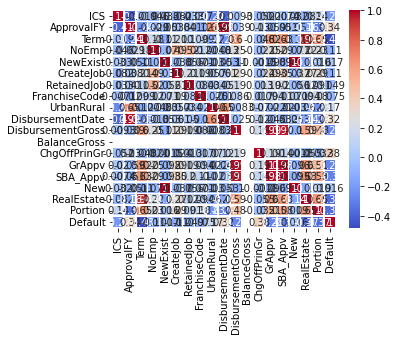

In [22]:
# Then appply filter methods by plotting a correlation matrix
# ---
#
df_corr = df.corr()
plt.figure(figsize=(5,4))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

In [25]:
print(df_corr["Default"].sort_values(ascending=False))

Default              1.000000
ChgOffPrinGr         0.380206
ApprovalFY           0.341595
DisbursementDate     0.322548
UrbanRural           0.168136
NewExist             0.016731
New                  0.015848
RetainedJob         -0.049063
FranchiseCode       -0.074979
CreateJob           -0.108659
NoEmp               -0.109915
ICS                 -0.215887
DisbursementGross   -0.272023
GrAppv              -0.284988
SBA_Appv            -0.295780
Portion             -0.369606
RealEstate          -0.370518
Term                -0.482494
BalanceGross              NaN
Name: Default, dtype: float64


There is a very low correlation between defaulting and NewExist,New,RetainedJob and FranchiseCode.
There is a high correlation between defaulting and Term, ChgOffPrinGr, ApprovalFY,Portion and RealEstate.

In [ ]:


df_features = df.drop(["Default"], axis=1)
df_2 = df["Default"]



x_train, x_test, y_train, y_test = train_test_split(df_features, df_2, test_size=0.25)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [35]:
df.dtypes


ICS                           int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
DisbursementDate              int64
DisbursementGross             int64
BalanceGross                  int64
MIS_Status                   object
ChgOffPrinGr                  int64
GrAppv                        int64
SBA_Appv                      int64
New                           int64
RealEstate                    int64
Portion                     float64
Default                       int64
dtype: object

In [37]:
df = df.drop(columns = ['ApprovalDate'])

In [38]:
df.head()

,ICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Default
0,532420,2001,36,1,1.0,0,0,1,0,1,1,2001,32812,0,0,0,30000,15000,0,0,0.5,0
1,531210,2001,56,1,1.0,0,0,1,0,1,1,2003,30000,0,0,0,30000,15000,0,0,0.5,0
2,531210,2001,36,10,1.0,0,0,1,0,1,1,2001,30000,0,0,0,30000,15000,0,0,0.5,0
3,531312,2003,36,6,1.0,0,0,1,0,1,1,2003,50000,0,0,0,50000,25000,0,0,0.5,0
4,531390,2006,240,65,1.0,3,65,1,1,0,1,2006,343000,0,0,0,343000,343000,0,1,1.0,0


In [39]:
from sklearn.model_selection import train_test_split
def train_and_test(data_frame):
  df_features = df.drop(["Default"], axis=1)
  df_2 = df["Default"]
  x_train = df.drop(columns='Default')
  y_train = df['Default']
  train_ratio = 0.75
  validation_ratio = 0.15
  test_ratio = 0.10
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_2, test_size=0.25)
  # We perform normalisation  
  norm = MinMaxScaler().fit(x_train) 
  x_train = norm.transform(x_train) 
  x_test = norm.transform(x_test)

  # ---Importing modules
  from sklearn.svm import SVR 
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.tree import DecisionTreeRegressor 
  from sklearn.linear_model import LinearRegression 

  #Models
  svm_regressor = SVR(kernel='rbf', C=10)
  knn_regressor = KNeighborsRegressor()
  dec_regressor = DecisionTreeRegressor(random_state=27)
  lr = LinearRegression()
  #fitting the data
  svm_regressor.fit(x_train, y_train)
  knn_regressor.fit(x_train, y_train)
  dec_regressor.fit(x_train, y_train)
  lr.fit(x_train, y_train)

  # Making Predictions  
  svm_y_pred = svm_regressor.predict(x_test)
  knn_y_pred = knn_regressor.predict(x_test)
  dec_y_pred = dec_regressor.predict(x_test)
  lr_y_pred = lr.predict(x_test)

  # Finally, evaluate our model 
  from sklearn import metrics 
  print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
  print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
  print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
  print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))) 

train_and_test(df)

SVM RMSE: 0.05873206642478417
KNN RMSE: 0.024712082528608622
Decision Tree RMSE: 0.0
Linear Regression RMSE: 7.367353889964269e-16
